In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
from scipy import linalg
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import sys
import matplotlib.animation as animation
np.set_printoptions(threshold=sys.maxsize)
import time

In [2]:
L = 1
N = 8 # the length
K = 8 # the width
dx = 1/N

A

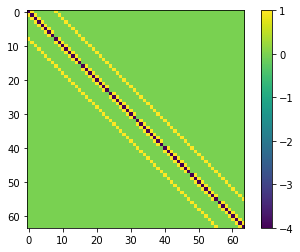

In [3]:
def matrix(N,K,L, circle = False):
    dx = L/N
    matrix = np.zeros((N*K,N*K))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= K:
            row[i-K] = 1
        if i < (K-1)*N:
            row[i+K] = 1
        if (i+1)%K !=1:
            row[i-1] = 1
        if (i+1)%K !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    if circle == True:
        dist_list = []
        print(circle)
        for l in range(N):
            a = (l+0.5) * dx - (L/2)
            for k in range(K):
                b = (k+0.5) * dx - (L/2)
                dist = np.sqrt(a**2 + b**2)
                dist_list = np.append(dist_list, dist)
        change_list = dist_list > (L/2)
        print(change_list)
        for i in range(len(change_list)):
            if change_list[i]:
                matrix[:, i] = 0
                matrix[i, :] = 0
        dist_list = np.array([])
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    return matrix
M = matrix(N,K,L)
colormap = plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.show()

B) for the matrix of a 4x4 

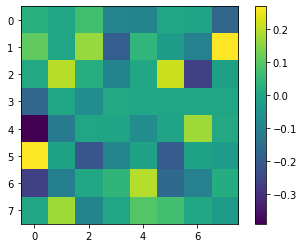

In [8]:
eigen, vector = linalg.eigh(M)
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[smallest]
eigen_grid = np.reshape(smallest_vector, (N,K))


colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

plots

C)

In [5]:
start_time = time.time()
eigen_vectors = linalg.eig(m)
print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'm' is not defined

In [ ]:
start_time = time.time()
eigen_vectors = eigs(m)
print("--- %s seconds ---" % (time.time() - start_time))